<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Seminario_ML/blob/main/1_Aprendizaje_Supervisado/Validaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align = 'center'> Validaciones cruzadas y búsqueda de hiperparámetros </h1>

La validación cruzada y la búsqueda de hiperparámetros son técnicas esenciales en el campo del aprendizaje de máquinas para garantizar el rendimiento óptimo de un modelo. La validación cruzada es un método para evaluar el rendimiento de un modelo al dividir los datos en conjuntos de entrenamiento y prueba múltiples veces, lo que permite una evaluación más robusta de su capacidad predictiva. Por otro lado, la búsqueda de hiperparámetros implica encontrar la combinación óptima de parámetros del modelo que maximice su rendimiento predictivo. Ambos procesos son fundamentales para garantizar que un modelo de aprendizaje profundo pueda generalizar bien a datos nuevos y desconocidos, maximizando su utilidad en aplicaciones del mundo real.

En el enfoque tradicional, dividimos la muestra total de los datos en un conjunto de entrenamiento y uno de prueba; entrenamos los datos con el primer conjunto y lo evaluamos con el segundo. Esta metodología presenta algunas debilidades; la principal es el sesgo de muestra, lo que puede ocasionar que la distribución de alguna variable en los datos de entrenamiento no sea cercana a la distribución de la variable en la muestra total.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

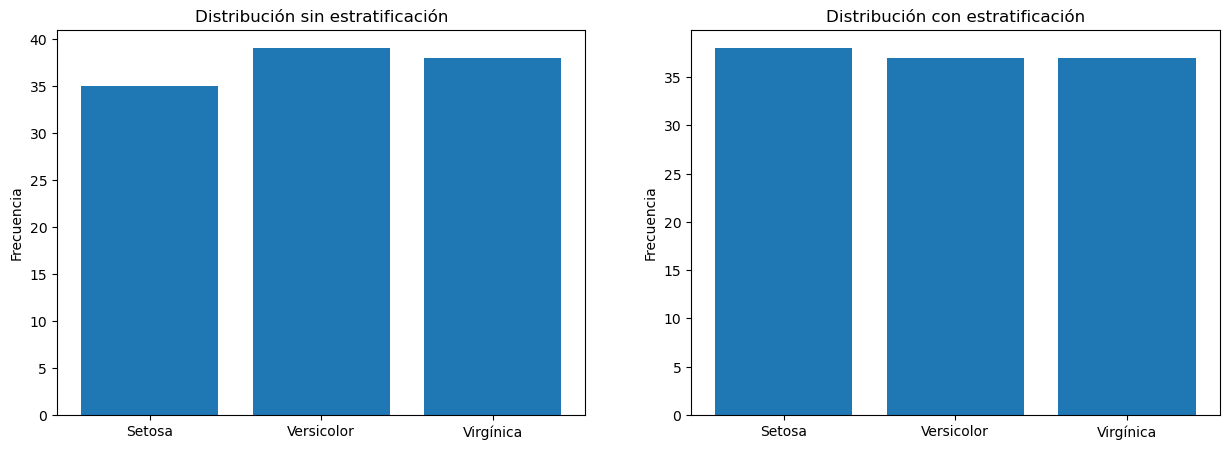

In [3]:
categories = ['Setosa', 'Versicolor', 'Virgínica']

fig, ax = plt.subplots(1,2, figsize=(15, 5))


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

frequencies = np.unique(y_train, return_counts=True)[1]

ax[0].bar(categories, frequencies)
ax[0].set_title('Distribución sin estratificación')
ax[0].set_ylabel('Frecuencia')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

frequencies = np.unique(y_train, return_counts=True)[1]

ax[1].bar(categories, frequencies)
ax[1].set_title('Distribución con estratificación')
ax[1].set_ylabel('Frecuencia');

<h2> Dejar uno por fuera (Leave-One-Out) </h2>

Otra estrategia adicional que puede emplearse es dividir los datos de entrenamiento en subconjuntos de tamaño $N$ y dividir cada subconjunto en su propio subconjunto de entrenamiento y prueba, en dónde esté último es un conjunto de un solo elemento. Es decir, sea $X_{N \text{x} K}$ nuestros datos de entrenamiento, generamos $N$ particiones diferentes permitiendo que cada elemento de la muestra sea el dato de prueba una sola vez. Para cada iteración calculamos el error del modelo, y finalmente promediamos los errores.


<img src = 'img/LOO.png'>

Fuente: [Raschka and Mirjalili](https://www.buscalibre.com.co/libro-python-machine-learning-machine-learning-and-deep-learning-with-python-scikit-learn-and-tensorflow-2-3rd-edition/9781789955750/p/52197210)

In [4]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
loo = LeaveOneOut()
knn = KNeighborsClassifier(n_neighbors=5)

y_true, y_pred = list(), list()

for train_ix, test_ix in loo.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # fit model
    knn.fit(X_train, y_train)
    
    # evaluate model
    yhat = knn.predict(X_test)
    
    # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])
    
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.967


<h2> Dejar $p$ por fuera (Leave P Out)

Un caso general de la técnica de dejar a uno por fuera es la de dejar $p$ por fuera, lo que consiste en replicar el mismo ejercicio anterior en el que los datos de prueba de cada subconjunto de los datos de entrenamiento es de tamaño $p$.

In [6]:
from sklearn.model_selection import LeavePOut
import datetime

In [7]:
start_time = datetime.datetime.now()

lpo = LeavePOut(p=2)
knn = KNeighborsClassifier(n_neighbors=5)

y_true, y_pred = list(), list()

for train_ix, test_ix in lpo.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    
    # fit model
    knn.fit(X_train, y_train)
    
    # evaluate model
    yhat = knn.predict(X_test)
    
    # store
    y_true.append(y_test[0])
    y_pred.append(yhat[0])
    
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

end_time = datetime.datetime.now()

print('Tiempo de procesamiento:', end_time - start_time)

Accuracy: 0.974
Tiempo de procesamiento: 0:00:04.243217


<h2> K-Folds </h2>

Una generalización de las metodologías anteriores consiste en una validación cruzada K-Fold que consiste en en dividir los datos de entrenamiento entre $K$ particiones. Para cada una de ellas entrenamos el modelo con los $K - 1$ subconjuntos, y evaluamos con el $K-ésimo$. Note que si $K = N$, esta técnica coincide con Leave One Out.

<img src='img/KCV.png'>

Fuente: [Scikit-Learn](https://scikit-learn.org/stable/modules/cross_validation.html)